In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics 
%matplotlib inline

In [55]:
#loading dataset
mnist_train=pd.read_csv('mnist_train.csv').sample(frac=1).reset_index(drop=True)
mnist_test= pd.read_csv('mnist_test.csv').sample(frac=1).reset_index(drop=True)


In [56]:
#print(digits)  //28*28
print(mnist_train.shape)
print(mnist_test.shape)

print(mnist_test.columns)

(60000, 785)
(10000, 785)
Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [155]:
#spliting data
x_train= mnist_test.drop(['label'],axis=1)
y_train =mnist_test['label']
x_test= mnist_train.drop(['label'],axis=1)
y_test=mnist_train['label']
#x_train,x_test,y_train,y_test= train_test_split(digits.data,digits.target,test_size=0.3,random_state=42)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)
print(x_train[:5])

(10000, 784) (60000, 784)
(10000,) (60000,)
   1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
0    0    0    0    0    0    0    0    0    0     0  ...      0      0   
1    0    0    0    0    0    0    0    0    0     0  ...      0      0   
2    0    0    0    0    0    0    0    0    0     0  ...      0      0   
3    0    0    0    0    0    0    0    0    0     0  ...      0      0   
4    0    0    0    0    0    0    0    0    0     0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 784 columns]


In [93]:
#train the model
from sklearn.linear_model import LogisticRegression

lg= LogisticRegression(solver='lbfgs', max_iter=10000)
lg.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [95]:
#predict

print(y_test[0:10])
print(lg.predict(x_test[0:10]))

0    0
1    1
2    3
3    8
4    7
5    9
6    8
7    0
8    7
9    7
Name: label, dtype: int64
[0 1 3 8 9 9 8 0 7 7]


In [104]:
#check accuracy
pred= lg.predict(x_test)
print(metrics.mean_squared_error(y_test,pred))
print(metrics.accuracy_score(y_test,pred))

2.2471428571428573
0.8857142857142857


In [105]:
cm=metrics.confusion_matrix(y_test,pred)
print(cm)

[[58  0  1  0  2  1  1  1  1  0]
 [ 0 75  0  0  0  2  0  0  0  0]
 [ 0  0 61  1  0  0  1  3  0  0]
 [ 0  0  3 72  0  1  0  2  3  0]
 [ 0  0  0  0 54  0  1  0  0  4]
 [ 1  1  0  3  0 48  2  0  2  0]
 [ 1  0  1  0  1  3 57  0  0  0]
 [ 0  1  0  1  0  0  0 74  0  3]
 [ 0  4  6  1  0  4  1  0 62  1]
 [ 0  0  0  4  7  1  0  3  0 59]]


In [156]:
# Now with SVM Method :
from sklearn import svm
import joblib

#svm_model= svm.SVC(kernel='rbf',C=10)
svm_model= svm.SVC(kernel='rbf',C=1000)
svm_model.fit(x_train,y_train)


SVC(C=1000)

In [162]:
joblib.dump(svm_model,"SVM_MNIST_RBF")
print(y_test[0:11])
print(svm_model.predict(x_test[0:11]))

0     0
1     1
2     3
3     8
4     7
5     9
6     8
7     0
8     7
9     7
10    5
Name: label, dtype: int64
[0 1 3 8 7 9 8 0 7 7 5]


In [158]:
svm_pred= svm_model.predict(x_test)
print(metrics.mean_squared_error(y_test,svm_pred))
print(metrics.accuracy_score(y_test,svm_pred))

0.6716666666666666
0.9619


In [159]:
cm=metrics.confusion_matrix(y_test,svm_pred)
print(cm)

[[5806    3   22    2    7   19   27    2   29    6]
 [   2 6628   38   10   18    8    3   14    7   14]
 [  19   18 5730   33   42    7   25   47   32    5]
 [   7   26  101 5753    2  105    6   33   70   28]
 [  11   10   29    1 5670    0   29   14    5   73]
 [  19   23   13   66   17 5187   53    2   24   17]
 [  21   14   11    0   16   50 5790    0   16    0]
 [  21   23   36    6   46    7    3 6045   10   68]
 [  13   65   54   47   22   56   25   13 5516   40]
 [  29    9   21   55   97   22    2   95   30 5589]]


In [134]:
#Now Apply Knn for the same algorithm 
from sklearn.neighbors import KNeighborsClassifier

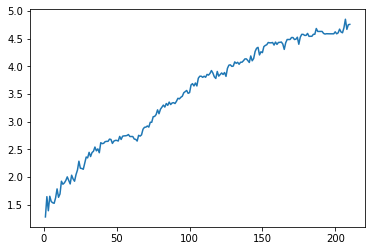

In [85]:
#class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *,
#weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', 
#metric_params=None,n_jobs=None)

#listacc=[]
#for i in range(1,211):
#    knn_model= KNeighborsClassifier(n_neighbors=int(i),p=2,metric='euclidean')
#    knn_model.fit(x_train,y_train)
#    knn_pred= knn_model.predict(x_test)
#   # print(i , metrics.mean_squared_error(y_test,knn_pred))
#    listacc.append(metrics.mean_squared_error(y_test,knn_pred))
#listi=list(range(1,211))
#plt.plot(listi,listacc)

In [86]:
knn_model= KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
knn_model.fit(x_train,y_train)
knn_pred= knn_model.predict(x_test)
print(y_test[0:11])
print(knn_model.predict(x_test[0:11]))

0     0
1     1
2     3
3     8
4     7
5     9
6     8
7     0
8     7
9     7
10    5
Name: label, dtype: int64
[0 1 3 8 7 9 1 0 7 7 5]


In [88]:
print(metrics.mean_squared_error(y_test,knn_pred))
print(metrics.accuracy_score(y_test,knn_pred))

1.697142857142857
0.9214285714285714


In [73]:
cm=metrics.confusion_matrix(y_test,knn_pred)
print(cm)

[[62  0  0  0  0  0  2  1  0  0]
 [ 0 76  0  0  0  0  0  1  0  0]
 [ 0  3 59  1  0  0  0  2  1  0]
 [ 0  0  1 79  0  1  0  0  0  0]
 [ 0  0  0  0 56  0  0  0  0  3]
 [ 0  3  0  2  0 51  0  0  1  0]
 [ 1  2  0  0  0  1 59  0  0  0]
 [ 0  2  0  0  1  1  0 75  0  0]
 [ 0  8  0  2  0  3  1  1 63  1]
 [ 0  0  0  1  4  0  0  3  1 65]]


In [152]:
from sklearn.metrics import classification_report, confusion_matrix  
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model

In [153]:
'''
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return svm.SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return svm.SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return svm.SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return svm.SVC(kernel='linear', gamma="auto")'''

In [154]:
'''for i in range(4):
    svclassifier =getClassifier(i) 
    svclassifier.fit(x_train, y_train)# Make prediction
    y_pred = svclassifier.predict(x_test)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))'''

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        65
           1       0.48      0.99      0.65        77
           2       0.90      0.68      0.78        66
           3       0.92      0.72      0.81        81
           4       0.90      0.76      0.83        59
           5       0.88      0.75      0.81        57
           6       0.94      0.78      0.85        63
           7       0.89      0.92      0.91        79
           8       0.84      0.77      0.80        79
           9       0.91      0.72      0.80        74

    accuracy                           0.80       700
   macro avg       0.85      0.79      0.81       700
weighted avg       0.85      0.80      0.81       700

Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.11      1.00      0.20        77
           2       0.00  

/home/sharad2000/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sharad2000/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sharad2000/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.11      1.00      0.20        77
           2       0.00      0.00      0.00        66
           3       0.00      0.00      0.00        81
           4       0.00      0.00      0.00        59
           5       0.00      0.00      0.00        57
           6       0.00      0.00      0.00        63
           7       0.00      0.00      0.00        79
           8       0.00      0.00      0.00        79
           9       0.00      0.00      0.00        74

    accuracy                           0.11       700
   macro avg       0.01      0.10      0.02       700
weighted avg       0.01      0.11      0.02       700



/home/sharad2000/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sharad2000/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sharad2000/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation: Linear kernel
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        65
           1       0.93      0.99      0.96        77
           2       0.83      0.95      0.89        66
           3       0.95      0.94      0.94        81
           4       0.92      0.92      0.92        59
           5       0.84      0.89      0.86        57
           6       0.94      0.94      0.94        63
           7       0.92      0.99      0.95        79
           8       0.97      0.81      0.88        79
           9       0.94      0.84      0.89        74

    accuracy                           0.92       700
   macro avg       0.92      0.92      0.92       700
weighted avg       0.92      0.92      0.92       700

